In [18]:
from mplsoccer import Pitch, FontManager
from matplotlib import rcParams
import matplotlib.pyplot as plt
import ScraperFC as sfc
import pandas as pd
from adjustText import adjust_text
from highlight_text import fig_text
import seaborn as sns
import traceback

In [19]:
scraper = sfc.WhoScored()
try:
    match_data = scraper.scrape_match(
        'https://www.whoscored.com/Matches/1549804/Live/England-Premier-League-2021-2022-Everton-Manchester-City'
    )
except:
    traceback.print_exc()
scraper.close()

In [20]:
match_data['matchCentreData']['playerIdNameDictionary']

{'23122': 'Asmir Begovic',
 '82438': 'Allan',
 '317804': 'Richarlison',
 '116317': 'Abdoulaye Doucouré',
 '31826': 'Séamus Coleman',
 '232261': 'Anwar El Ghazi',
 '275035': 'Donny van de Beek',
 '136824': 'Alexander Iwobi',
 '345516': 'Vitalii Mykolenko',
 '25964': 'Salomón Rondón',
 '71522': 'Andros Townsend',
 '131519': 'Dele Alli',
 '107941': 'Michael Keane',
 '110189': 'Jordan Pickford',
 '349669': 'Anthony Gordon',
 '381045': 'Jarrad Branthwaite',
 '136945': 'Demarai Gray',
 '255961': 'Jonjoe Kenny',
 '297544': 'Mason Holgate',
 '396975': 'Nathan Patterson',
 '104749': 'Riyad Mahrez',
 '73084': 'Kevin De Bruyne',
 '19119': 'Fernandinho',
 '121774': 'Ederson',
 '279379': 'Gabriel Jesus',
 '77464': 'Ilkay Gündogan',
 '122945': 'Nathan Aké',
 '128967': 'João Cancelo',
 '136741': 'Bernardo Silva',
 '313171': 'Rúben Dias',
 '303139': 'Rodri',
 '122117': 'Aymeric Laporte',
 '273257': 'Oleksandr Zinchenko',
 '113069': 'Jack Grealish',
 '69778': 'Kyle Walker',
 '97692': 'Raheem Sterling',

In [21]:
player_id = 128967
event_locations = list()

for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] == player_id:
        if event['type']['displayName'] == 'Pass':
            event_locations.append([event['x'], event['y'], event['endX'], event['endY'], event['type']['displayName'], event['outcomeType']['displayName']])
#     elif event['playerId'] == player_id:
#         event_locations.append([event['x'], event['y'], event['type']['displayName'], event['outcomeType']['displayName']])

event_locations

[[18.7, 94.7, 11.2, 81.2, 'Pass', 'Successful'],
 [40.4, 81.1, 35.1, 54.8, 'Pass', 'Successful'],
 [67.0, 77.5, 96.5, 74.1, 'Pass', 'Successful'],
 [38.2, 69.0, 41.5, 61.8, 'Pass', 'Successful'],
 [26.5, 86.9, 34.9, 97.5, 'Pass', 'Successful'],
 [79.8, 82.9, 100.0, 66.4, 'Pass', 'Unsuccessful'],
 [62.6, 95.1, 59.4, 80.9, 'Pass', 'Successful'],
 [62.2, 95.6, 40.1, 76.7, 'Pass', 'Successful'],
 [55.6, 75.1, 53.2, 66.7, 'Pass', 'Successful'],
 [75.7, 83.9, 74.1, 67.2, 'Pass', 'Successful'],
 [73.3, 46.7, 73.1, 65.2, 'Pass', 'Successful'],
 [25.7, 75.9, 33.7, 92.3, 'Pass', 'Successful'],
 [84.5, 89.1, 97.1, 46.3, 'Pass', 'Unsuccessful'],
 [10.9, 75.9, 12.4, 77.0, 'Pass', 'Unsuccessful'],
 [45.7, 92.7, 51.1, 80.0, 'Pass', 'Successful'],
 [42.6, 88.6, 41.5, 57.1, 'Pass', 'Successful'],
 [43.6, 95.0, 38.3, 81.5, 'Pass', 'Successful'],
 [54.3, 91.1, 56.4, 71.4, 'Pass', 'Successful'],
 [7.4, 72.9, 18.0, 81.2, 'Pass', 'Successful'],
 [52.2, 100.0, 44.9, 78.1, 'Pass', 'Successful'],
 [4.6, 90.8, 

In [22]:
playerPass = pd.DataFrame(event_locations, columns=['x', 'y', 'endX', 'endY', 'type', 'outcome'])
playerPass

,x,y,endX,endY,type,outcome
0,18.7,94.7,11.2,81.2,Pass,Successful
1,40.4,81.1,35.1,54.8,Pass,Successful
2,67.0,77.5,96.5,74.1,Pass,Successful
3,38.2,69.0,41.5,61.8,Pass,Successful
4,26.5,86.9,34.9,97.5,Pass,Successful
...,...,...,...,...,...,...
79,77.8,76.1,92.3,49.3,Pass,Unsuccessful
80,32.1,69.6,28.6,59.1,Pass,Successful
81,74.4,100.0,80.1,91.2,Pass,Successful
82,53.7,92.7,40.6,94.8,Pass,Successful


In [23]:
playerPass['x']=playerPass['x']*1.2
playerPass['y']=playerPass['y']*0.8
playerPass['endX']=playerPass['endX']*1.2
playerPass['endY']=playerPass['endY']*0.8

In [24]:
df1 = playerPass[playerPass['outcome'] == 'Successful']
df1

,x,y,endX,endY,type,outcome
0,22.44,75.76,13.44,64.96,Pass,Successful
1,48.48,64.88,42.12,43.84,Pass,Successful
2,80.40,62.00,115.80,59.28,Pass,Successful
3,45.84,55.20,49.80,49.44,Pass,Successful
4,31.80,69.52,41.88,78.00,Pass,Successful
...,...,...,...,...,...,...
77,28.92,68.80,35.40,28.88,Pass,Successful
78,76.32,76.72,88.32,78.24,Pass,Successful
80,38.52,55.68,34.32,47.28,Pass,Successful
81,89.28,80.00,96.12,72.96,Pass,Successful


In [25]:
df2 = playerPass[playerPass['outcome'] == 'Unsuccessful']
df2

,x,y,endX,endY,type,outcome
5,95.76,66.32,120.00,53.12,Pass,Unsuccessful
12,101.40,71.28,116.52,37.04,Pass,Unsuccessful
13,13.08,60.72,14.88,61.60,Pass,Unsuccessful
26,85.92,69.44,90.00,70.96,Pass,Unsuccessful
27,94.08,60.88,97.80,60.16,Pass,Unsuccessful
29,94.08,66.80,120.00,52.24,Pass,Unsuccessful
32,87.12,77.52,90.72,76.24,Pass,Unsuccessful
33,85.08,72.88,102.72,62.16,Pass,Unsuccessful
38,8.16,66.16,37.08,54.32,Pass,Unsuccessful
42,29.64,75.04,43.32,56.48,Pass,Unsuccessful


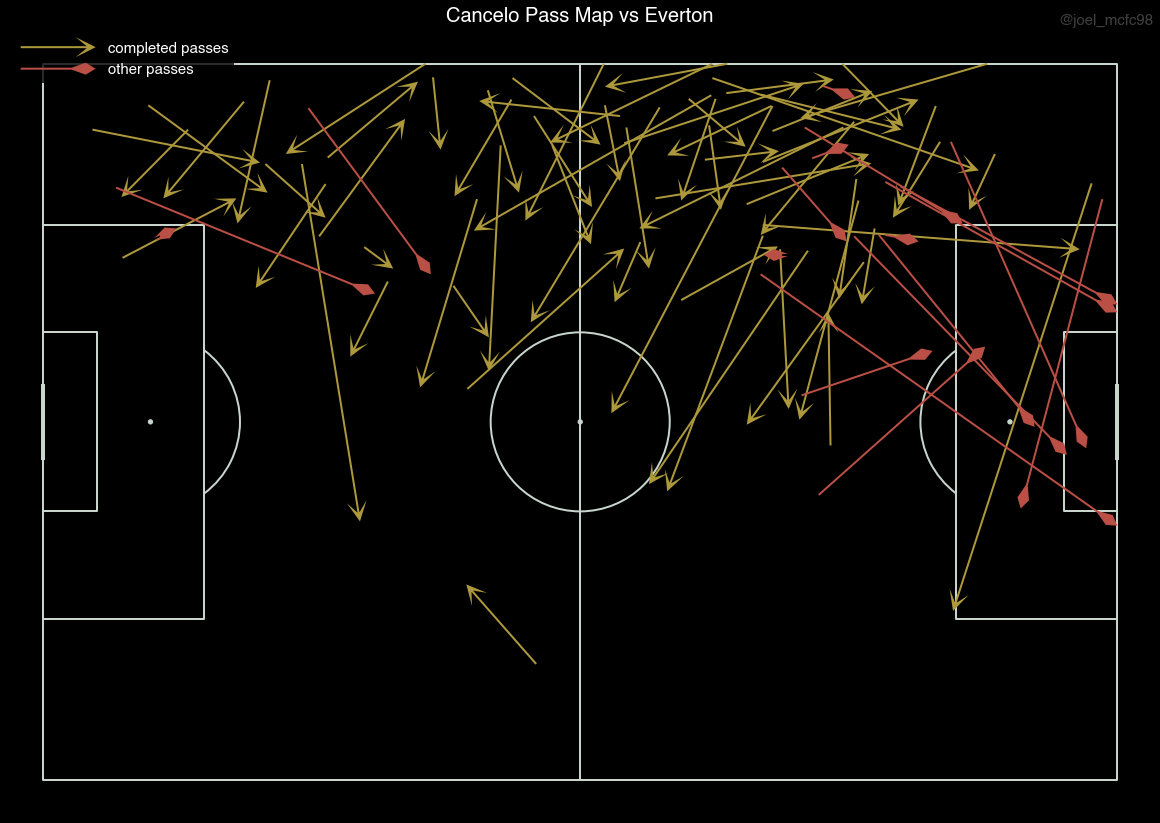

In [27]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 12), constrained_layout=True, tight_layout=False)
plt.rcParams['font.family'] = 'Helvetica' ##set global font
fig.set_facecolor('#000000')
ax.patch.set_facecolor('#000000')

dict = {'fontsize': plt.rcParams['axes.titlesize'],
     'fontweight' : plt.rcParams['axes.titleweight']}

plt.gca().invert_yaxis()

# Plot the completed passes
pitch.arrows(df1.x, df1.y, df1.endX, df1.endY, width=2, headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the other passes
pitch.arrows(df2.x, df2.y, df2.endX, df2.endY, width=2, headwidth=6, headlength=5, headaxislength=12, color='#ba4f45', ax=ax, label='other passes')

# setup the legend
ax.legend(facecolor='#000000', handlelength=5, edgecolor='None', fontsize=15, loc='upper left', labelcolor='white')

ax.text(1, 1, '@joel_mcfc98', transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='right', va='bottom')

# plt.legend(['Succesful Pass', 'Unsuccessful Pass'], loc='upper left')
plt.title('Cancelo Pass Map vs Everton',fontdict=dict,color='white',size=20, pad =plt.rcParams['axes.titlepad'])  
fig.savefig("Cancelo", dpi=180) ##save image
